Этап 2. Анализ данных
Загрузите данные из файла JSON в датафрейм с помощью Pandas
Этап 3. Визуализация данных
Постройте график распределения типов событий информационной
безопасности. Используйте Seaborn или Matplotlib для создания визуализации.

             timestamp                                          signature
0  2023-08-21 08:00:00  MALWARE-CNC Win.Trojan.Jadtre variant outbound...
1  2023-08-21 09:00:00  EXPLOIT Remote Windows Win32k elevation of pri...
2  2023-08-21 10:00:00            EXPLOIT Java JRE to Oracle WebLogic RCE
3  2023-08-21 11:00:00          NETBIOS DCERPC NCACN-IP-TCP interfaces BO
4  2023-08-21 12:00:00  MALWARE-CNC User-Agent known malicious connect...
..                 ...                                                ...
94 2023-08-25 07:00:00  INDICATOR-COMPROMISE Suspicious inbound to myS...
95 2023-08-25 08:00:00                   EXPLOIT Multiple IIS 6.0 attempt
96 2023-08-25 09:00:00                  EXPLOIT Oracle 9i TNS Listener BO
97 2023-08-25 10:00:00      NETBIOS SMB-DS srvsvc NetrPathCanonicalize BO
98 2023-08-25 11:00:00  MALWARE-CNC Win.Trojan.Jadtre variant outbound...

[99 rows x 2 columns]
Типы событий:
 ['MALWARE-CNC Win.Trojan.Jadtre variant outbound connection'
 'EXPLOIT Rem

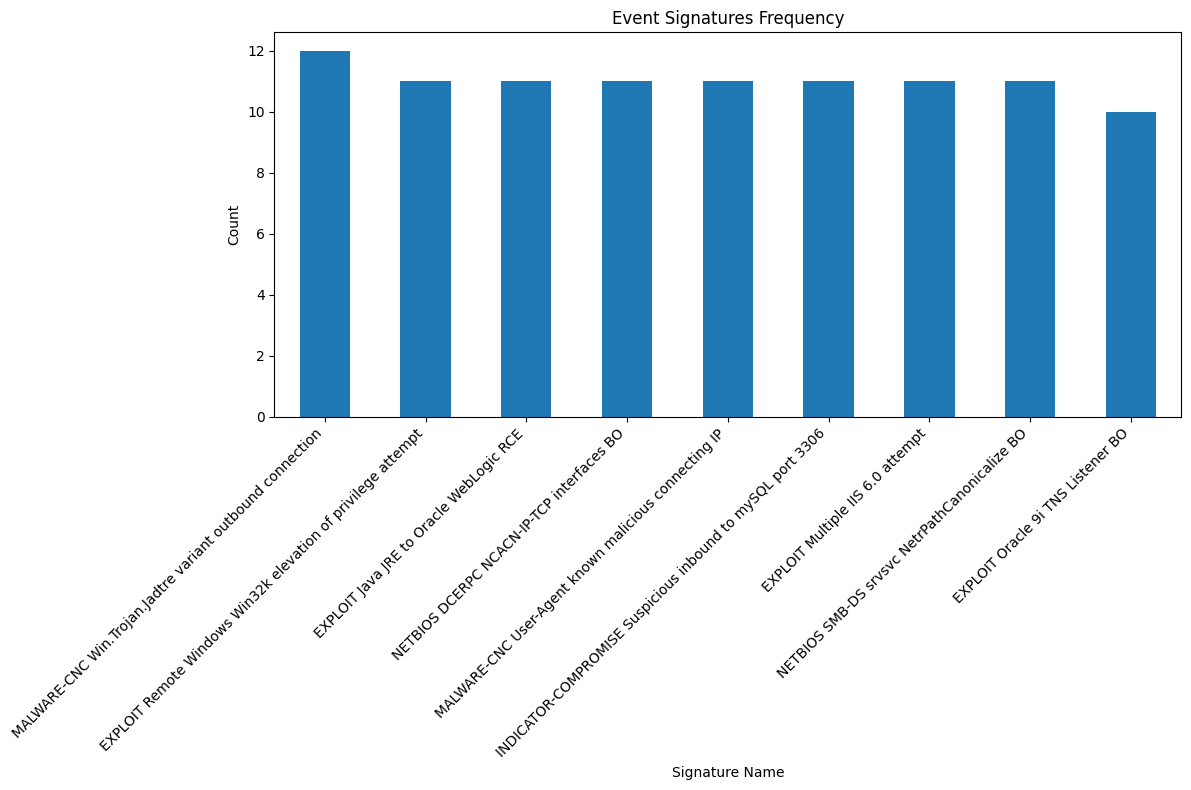

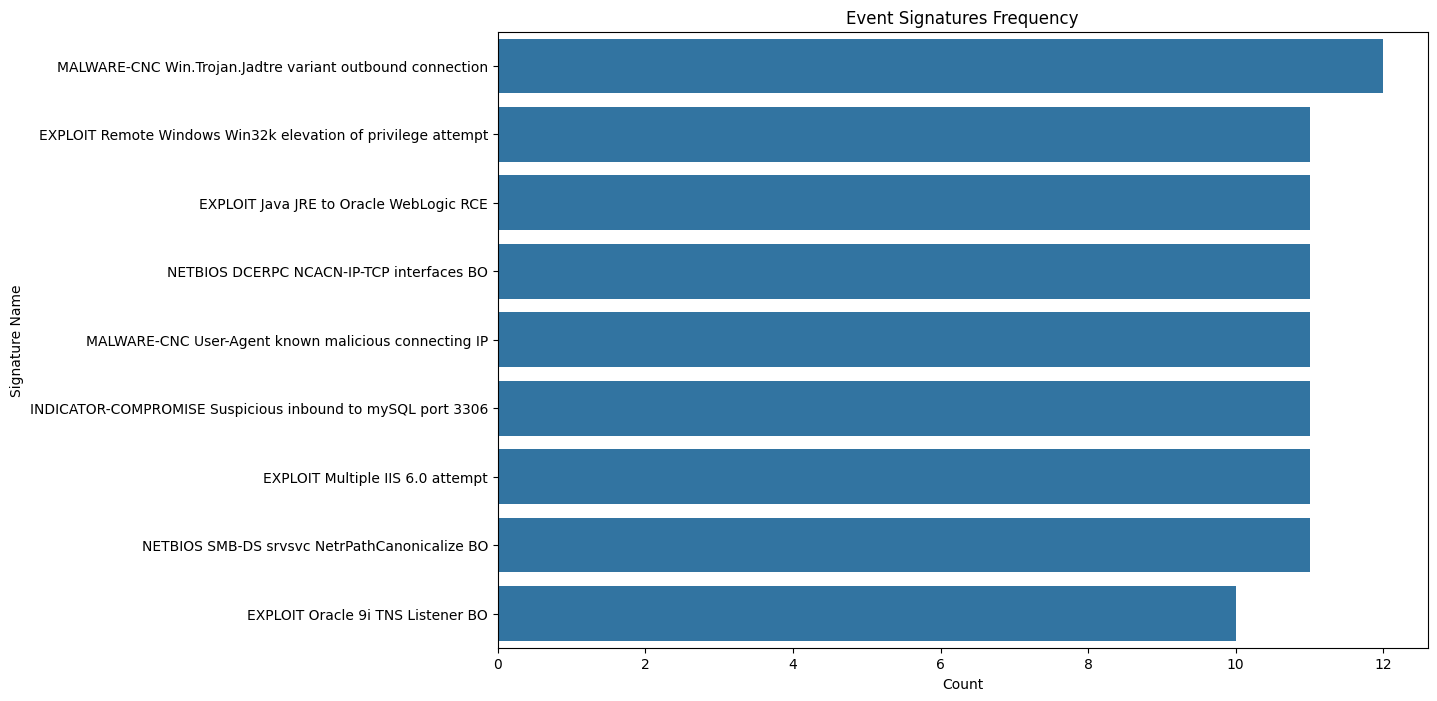

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Загрузка данных из JSON
with open("events.json", "r") as file:
  data = json.load(file)
  df = pd.DataFrame(data["events"])
#Конвертирование timestamp в формат datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
print(df)

#Показать типы событий
print("Типы событий:\n", df['signature'].unique())

#Количества событий каждого типа
print("Количество событий каждого типа:\n", df['signature'].value_counts())

#Cтроим график на matplotlib
counts = df['signature'].value_counts()
plt.figure(figsize=(12,8))
counts.plot(kind='bar')
plt.title("Event Signatures Frequency")
plt.ylabel("Count")
plt.xlabel("Signature Name")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Cтроим график на seaborn
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='signature', order=df['signature'].value_counts().index) 
plt.title("Event Signatures Frequency") 
plt.ylabel("Signature Name")
plt.xlabel("Count") 
plt.show()